# Applying the Method Of Manufactured Solutions to SWIRL 

## Introduction

The method of manufactured solutions (MMS) is a general procedure for constructing an analytical solution and determining the accuracy via convergence rate. As a result, MMS serves as a means of code verification. In this work, SWIRL, a code used to calculate the radial modes within an infinitely long duct, is validated using MMS. SWIRL has two components that require numerical techniques and approximation. First, SWIRL accepts a given mean flow and uses numerical integration to obtain the speed of sound.  Secondly, SWIRL constructs a linear matrix equation using the Linearized Euler Equations (LEE) as a function of radius. This work aims to use the Method of Manufactured solutions to reassure that these two steps lead to accurate results.

In [1]:
# Set Up Libraries
%run 01-set-up.ipynb

In [2]:
# Defining the necessary symbolic variables
%run 02-symbolic-variables.ipynb

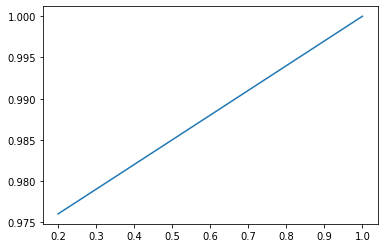

speed of sound =  0.1*tanh(0.1*r - 0.1) + 0.1*tanh(0.1*r - 0.075) + 0.1*tanh(0.1*r - 0.05) + 0.99250468320737


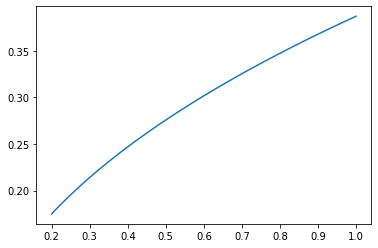

tangential mach number =  1.58113883008419*(r*(-0.0201510384166331*tanh(0.1*r - 0.1)**2 - 0.0201510384166331*tanh(0.1*r - 0.075)**2 - 0.0201510384166331*tanh(0.1*r - 0.05)**2 + 0.0604531152498994)/(0.100755192083166*tanh(0.1*r - 0.1) + 0.100755192083166*tanh(0.1*r - 0.075) + 0.100755192083166*tanh(0.1*r - 0.05) + 1))**0.5


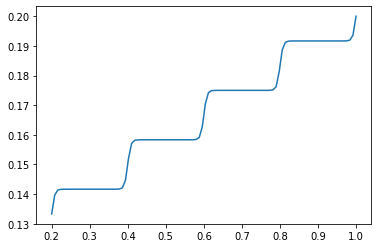

axial mach number =  0.00833333333333333*tanh(125.0*r - 125.0) + 0.00833333333333333*tanh(125.0*r - 100.0) + 0.00833333333333333*tanh(125.0*r - 75.0) + 0.00833333333333333*tanh(125.0*r - 50.0) + 0.00833333333333333*tanh(125.0*r - 25.0) + 0.166666666666667


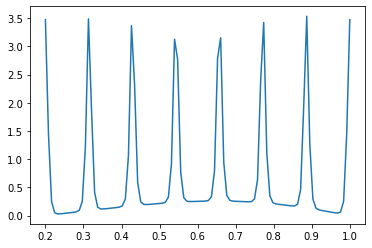

v_r =  0.763888888888943*r + 3.56038411458294*(r - 0.2)**5 - 5.15407986111027*(r - 0.2)**4 + 0.651041666666159*(r - 0.2)**3 - 3.47222222222222*tanh(125.0*r - 125.0)**2 - 3.47222222222222*tanh(125.0*r - 110.714285714286)**2 - 3.47222222222222*tanh(125.0*r - 96.4285714285714)**2 - 3.47222222222222*tanh(125.0*r - 82.1428571428571)**2 - 3.47222222222222*tanh(125.0*r - 67.8571428571429)**2 - 3.47222222222222*tanh(125.0*r - 53.5714285714286)**2 - 3.47222222222222*tanh(125.0*r - 39.2857142857143)**2 - 3.47222222222222*tanh(125.0*r - 25.0)**2 + 27.625


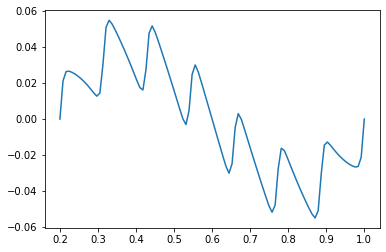

v_t =  1.51909722222205*(r - 0.2)**3 - 1.82291666666646*(r - 0.2)**2 + 0.0277777777777778*tanh(125.0*r - 125.0) + 0.0277777777777778*tanh(125.0*r - 110.714285714286) + 0.0277777777777778*tanh(125.0*r - 96.4285714285714) + 0.0277777777777778*tanh(125.0*r - 82.1428571428571) + 0.0277777777777778*tanh(125.0*r - 67.8571428571429) + 0.0277777777777778*tanh(125.0*r - 53.5714285714286) + 0.0277777777777778*tanh(125.0*r - 39.2857142857143) + 0.0277777777777778*tanh(125.0*r - 25.0) + 0.194444444444423


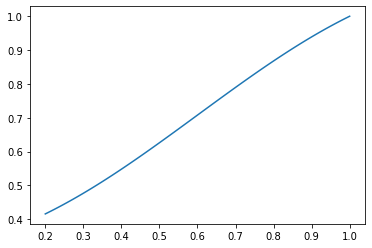

v_x =  0.0454545454545455*tanh(2.5*r - 2.5) + 0.0454545454545455*tanh(2.5*r - 2.27777777777778) + 0.0454545454545455*tanh(2.5*r - 2.05555555555556) + 0.0454545454545455*tanh(2.5*r - 1.83333333333333) + 0.0454545454545455*tanh(2.5*r - 1.61111111111111) + 0.0454545454545455*tanh(2.5*r - 1.38888888888889) + 0.0454545454545455*tanh(2.5*r - 1.16666666666667) + 0.0454545454545455*tanh(2.5*r - 0.944444444444445) + 0.0454545454545455*tanh(2.5*r - 0.722222222222222) + 0.0454545454545455*tanh(2.5*r - 0.5) + 0.707850846972511


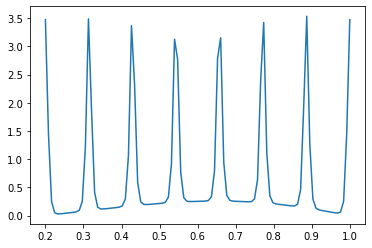

p =  0.763888888888943*r + 3.56038411458294*(r - 0.2)**5 - 5.15407986111027*(r - 0.2)**4 + 0.651041666666159*(r - 0.2)**3 - 3.47222222222222*tanh(125.0*r - 125.0)**2 - 3.47222222222222*tanh(125.0*r - 110.714285714286)**2 - 3.47222222222222*tanh(125.0*r - 96.4285714285714)**2 - 3.47222222222222*tanh(125.0*r - 82.1428571428571)**2 - 3.47222222222222*tanh(125.0*r - 67.8571428571429)**2 - 3.47222222222222*tanh(125.0*r - 53.5714285714286)**2 - 3.47222222222222*tanh(125.0*r - 39.2857142857143)**2 - 3.47222222222222*tanh(125.0*r - 25.0)**2 + 27.625


In [3]:
# Generating manufactured solutions
%run 03-mms-mean-flow.ipynb

In [4]:
# import functions to substitute the manufactured solutions into the LEE
%run 04-source-substitution-function.ipynb

### Defining Linearized Euler Equation (LEE) Source Terms

Initially the source terms were defined without mention of the indices of the matrices they make up. In other words, there was no fore sight on the fact that these source terms are sums 
of the elements within A,B, and X. To investigate the source terms in greater detail, the FORTRAN code that calls the source terms will output the terms within the source term and then sum them, instead of just their sum.

### Eigenvalue Decomposition


$$ [A]{x} = \lambda [B] {x} $$

which can be rearranged as,

$$ [A]{x} - \lambda [B] {x} = 0$$

Here, $x$ is an eigenvector composed of the perturbation variables, $v_r,v_{\theta},v_x,p$ and $\lambda$ is the associated eigenvalue, (Note: $\lambda = -i \bar{\gamma}$)

Writing this out we obtain ....

Linear System of Equations:
\begin{equation}
-
i \left(
\frac{k}{A} - \frac{m}{r} M_{\theta}
\right)
v_r 
-
\frac{2}{r} M_{\theta} v_{\theta} 
+
\frac{dp}{dr} 
+
\frac{(\kappa - 1)}{r} M_{\theta}^2 p
-
\lambda M_x v_r =S_1
\end{equation}

Using matrix notation,

\begin{equation}
A_{11}
x_1 
-
A_{12} x_2 
+
A_{14} x_4
-
\lambda B_{11} x_1 = S_1
\end{equation}

But $A_{14}$ and $A_{41}$ in Kousen's paper only has the derivative operator. Since I am currntly writing the matrix out term by term and not doing the matrix math to obtain the symbolic expressions, I will define $A_{14}$ with $dp/dr$ and $A_{41}$ with $dv_r/dr$
Similarly,
\begin{align}
A_{21} x_1 &-
A_{22} x_2 +
A_{24} x_4 &-
\lambda B_{22} x_2 &= S_2 \\
A_{31} x_1 &-
A_{33} x_3 &-
\lambda (B_{33} x_3 + B_{34} x_4) &= S_3\\
A_{41} x_1 &+
A_{42} x_2 +
A_{44} x_4 &- 
\lambda (B_{33} x_3 + B_{44} x_4) &= S_4
\end{align}
Now we can begin looking at the source terms, term by term. They each should also converge at a known rate

In [5]:
%run 05-source-term-system-of-equations.ipynb

⎡                two                                                          
⎢  Mₜ⋅two⋅vₜ   Mₜ   ⋅p⋅(κ - one)                ⎛  Mₜ⋅m          ak⎞  i⋅m⋅p   
⎢- ───────── + ───────────────── + dp_dr - i⋅vᵣ⋅⎜- ──── - Mₓ⋅γ + ──⎟, ───── - 
⎣      r               r                        ⎝   r            A ⎠    r     

                               ⎛       three                    ⎞             
     ⎛  Mₜ⋅m          ak⎞      ⎜Mₜ   Mₜ     ⋅(κ - one)          ⎟             
i⋅vₜ⋅⎜- ──── - Mₓ⋅γ + ──⎟ + vᵣ⋅⎜── + ───────────────── + dM_t_dr⎟, γ⋅i⋅one⋅p -
     ⎝   r            A ⎠      ⎝r          r⋅two                ⎠             

                                ⎛  two                       ⎞                
      ⎛  Mₜ⋅m          ak⎞      ⎜Mₜ   ⋅Mₓ⋅(κ - one)          ⎟                
 i⋅vₓ⋅⎜- ──── - Mₓ⋅γ + ──⎟ + vᵣ⋅⎜────────────────── + dM_x_dr⎟, dv_r_dr + γ⋅i⋅
      ⎝   r            A ⎠      ⎝      r⋅two                 ⎠                

                                                ⎛

Now lets get these source terms by using the matrix form of the equations and see if they're
equal

In [6]:
%run 06-source-term-matrix-equation.ipynb

In [7]:
# Checking if the matrix expressions equal the linear system of equations
print(S[0].equals(SS[0]))
print(S[1].equals(SS[1]))
print(S[2].equals(SS[2]))
print(S[3].equals(SS[3]))

True
True
True
True


In [8]:
%run 07-source-term-comparison.ipynb

True
True
True
True


In [9]:
for i in range(len(S)):
    S[i] = SourceSubstitution(S[i], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytical     , \
                       v_r_analytical     , \
                       v_t_analytical     , \
                       v_x_analytical     , \
                       p_analytical       , \
                       dp_dr_analytical   , \
                       dv_r_dr_analytical , \
                       dM_x_dr_analytical , \
                       dM_t_dr_analytical , \
                       )

for i in range(len(A_times_x[:,0])):
    for j in range(len(A_times_x[0,:])):
        A_times_x[i,j] = SourceSubstitution(\
                       A_times_x[i,j], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytical     , \
                       v_r_analytical     , \
                       v_t_analytical     , \
                       v_x_analytical     , \
                       p_analytical       , \
                       dp_dr_analytical   , \
                       dv_r_dr_analytical , \
                       dM_x_dr_analytical , \
                       dM_t_dr_analytical , \
                                      ) 
        lambda_B_times_x[i,j] = SourceSubstitution(\
                       lambda_B_times_x[i,j], \
                       A_analytic         , \
                       M_t_analytic   , \
                       M_x_analytical     , \
                       v_r_analytical     , \
                       v_t_analytical     , \
                       v_x_analytical     , \
                       p_analytical       , \
                       dp_dr_analytical   , \
                       dv_r_dr_analytical , \
                       dM_x_dr_analytical , \
                       dM_t_dr_analytical , \
                                         )


In [10]:
%run create-fortran-scripts/create-fortran-file-sound-speed.ipynb

In [11]:
%run create-fortran-scripts/create-fortran-file-perturbation-variables.ipynb

In [12]:
S_1 = S[0]
S_2 = S[1]
S_3 = S[2]
S_4 = S[3]
%run create-fortran-scripts/create-fortran-file-LEE-source-terms.ipynb

In [13]:
%run create-fortran-scripts/create-fortran-file-LEE-source-terms-components.ipynb